In [1]:
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.datasets import load_boston
import pandas as pd
import io
import numpy as np

# Tennis points won

In the `tennis.csv` files of games played by Federer.

Does Federer score more total points than his opponent on average in a game?

In [2]:
data_url = r'../m2-2-viz/data/tennis.csv'
dataframe = pd.read_csv(data_url)
df = dataframe

In [3]:
# demonstrates the # of matches where fed tot points won > opponents

fedW = df.loc[ df['player1 total points won'] > df['player2 total points won'] ]
fedL = df.loc[ df['player1 total points won'] < df['player2 total points won'] ]
len(fedW) > len(fedL)

True

In [4]:
df['player1 total points won'].mean(), df['player2 total points won'].mean()

(86.86952288218112, 73.91723466407011)

# 2. College correlations

The `college.csv` filecontains a number of variables for 777 different universities and colleges in the US.

### 2.1

Use a scatterplot matrix to analyze the data and answer the following questions:

1. Which columns are possibly from a normal distribution? Statistically test if this is the case (you'll find a function for it in `scipy.stats`). For each explain if it is or not normally distributed.

2. Of the columns that aren't normally distributed, name which distribution could possibly fit them? (Use your research skills)

3. Give 3 pairs of columns that are highly correlated? Give their correlation coefficients.

4. Give 3 column pairs that are not correlated? Give their correlation coefficients.

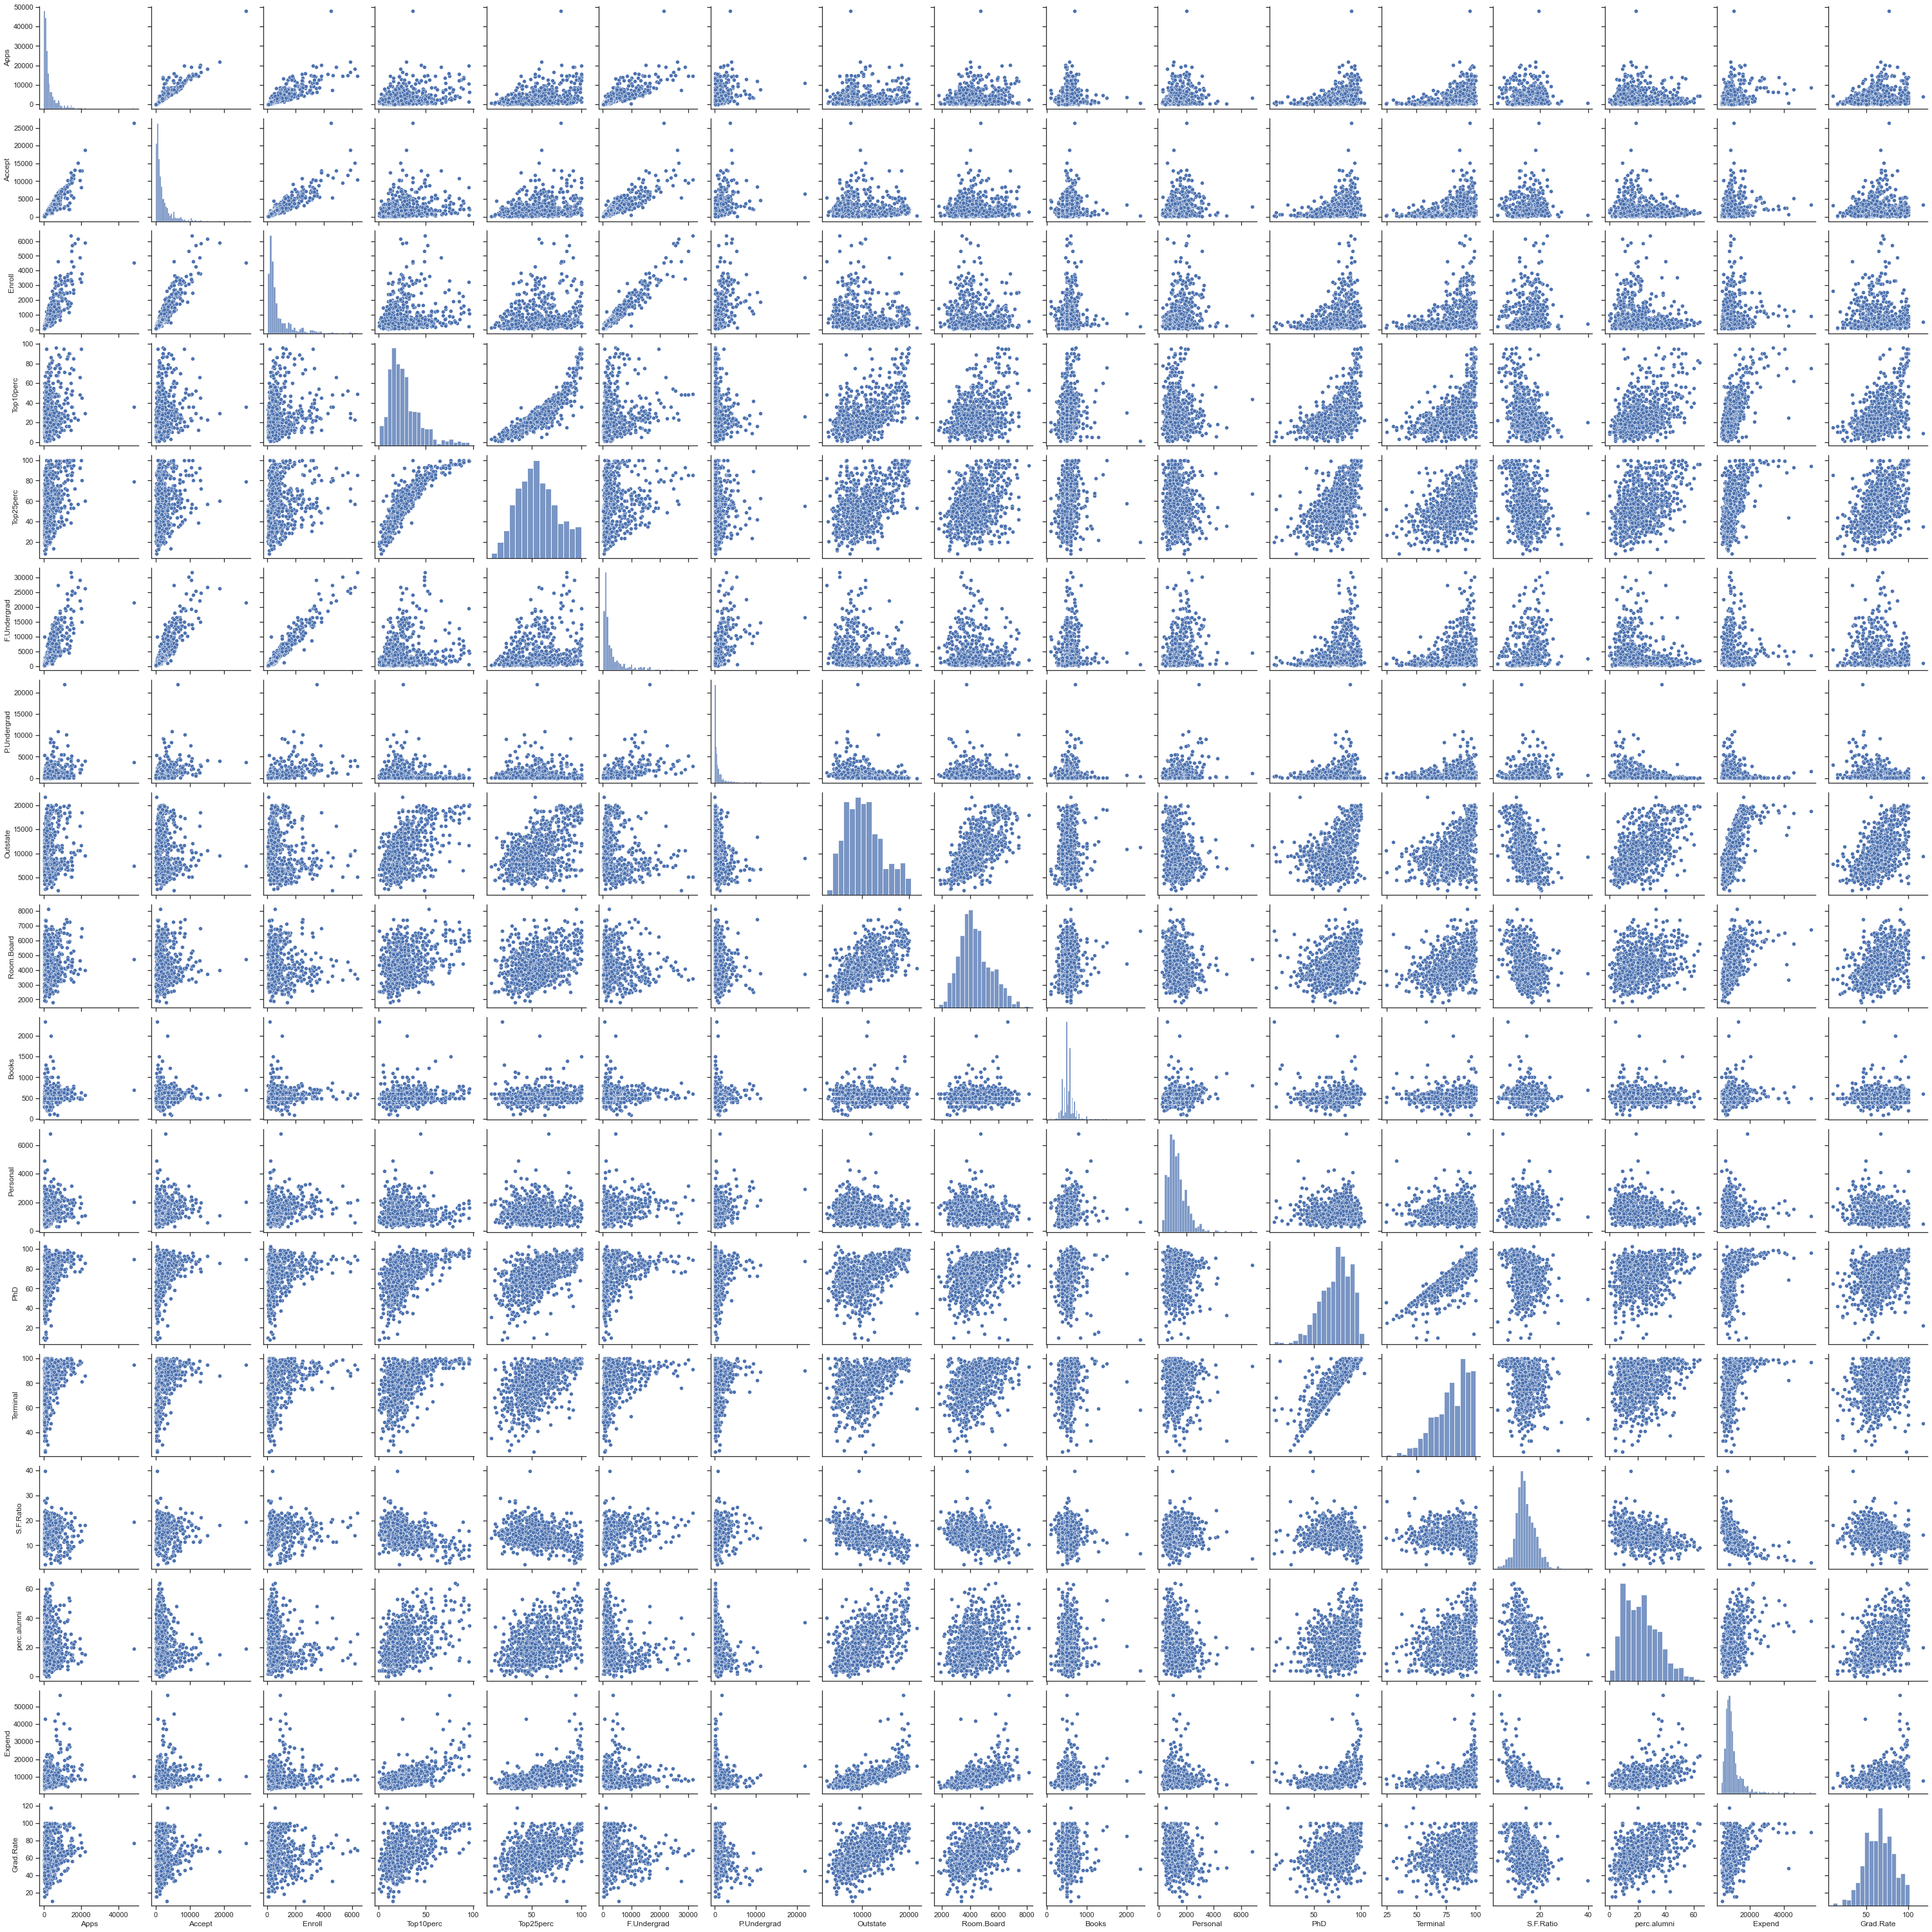

In [5]:
import seaborn as sns

data_url = r'data/college.csv'
dataframe = pd.read_csv(data_url)
df = dataframe
sns.set_theme(style="ticks")

# sns.pairplot(df)

normal dist:  
    top10perc, top25perc, perc alum, sf ratio, grad rate, outstate, room board  
      
poisson:  
    'expend', 'F.Undergrad', 'P.Undergrad',  'Apps', 'Accept', 'Enroll', 'books'   
      
skew norml, Log Normal?  
     'Personal'
      
plateauy, Log Normal?  
'Terminal', 'PhD'  

In [6]:
data_url = r'data/college.csv'
dataframe = pd.read_csv(data_url)
df = dataframe
df.columns

"""
2.1 Answers (3 & 4):
    strong corr: apps/accept 0.943451, enroll/accept 0.911637, enroll/f.undergrad 0.964640
    weak corr: grad.rate/books 0.001061, grad.rate/enroll -0.022341, expend/f.undergrad 0.018652
"""


Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

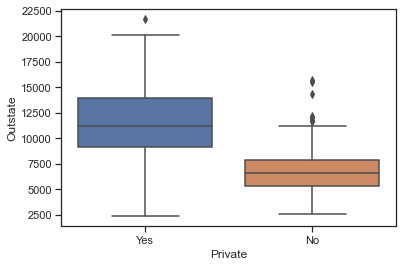

In [7]:
import seaborn as sns
ax = sns.boxplot(x=df.Private, y=df.Outstate)

### 2.2 Boxplot

Make a boxplot of private vs outstate colleges. It should look like:

![](boxplort.png)

In [9]:
auto = open('data/auto.csv', 'r')
read = auto.read()
split = read.split('\n')
split.pop(1)
t = ''.join(split)
t = t.replace('\t', ' ')
inp = io.StringIO(t)

df = pd.read_csv(inp, delim_whitespace=True)
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name18.0,8,...,1.246,ford ranger31.0,4.202,119.0.5,82.00,2720..2,19.4.2,82.29,1.247,chevy s-10


array([[<AxesSubplot:xlabel='horsepower', ylabel='horsepower'>,
        <AxesSubplot:xlabel='weight', ylabel='horsepower'>,
        <AxesSubplot:xlabel='year', ylabel='horsepower'>,
        <AxesSubplot:xlabel='mpg', ylabel='horsepower'>],
       [<AxesSubplot:xlabel='horsepower', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='year', ylabel='weight'>,
        <AxesSubplot:xlabel='mpg', ylabel='weight'>],
       [<AxesSubplot:xlabel='horsepower', ylabel='year'>,
        <AxesSubplot:xlabel='weight', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='mpg', ylabel='year'>],
       [<AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='mpg', ylabel='mpg'>]], dtype=object)

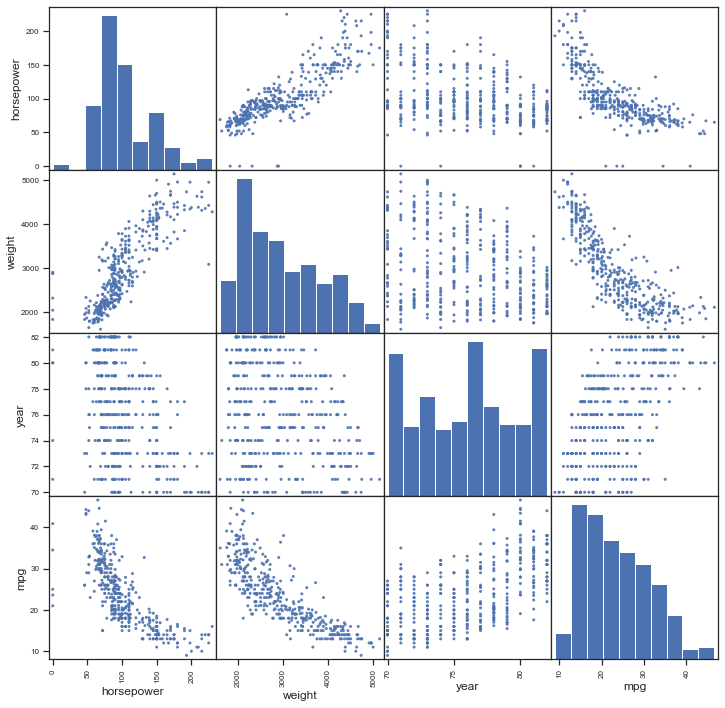

In [10]:
auto = open('data/auto.csv', 'r')
read = auto.read()
read = read.split('\n')
# trim the useless line
read.pop(1)
# replace the ? in horsepower
for e in read:
    if '?' in e:
        ind = read.index(e)
        read[ind] = e.replace('?', '0')

read = '\n'.join(read)
inp = io.StringIO(read)
df = pd.read_csv(inp, delim_whitespace=True)
pd.plotting.scatter_matrix(df[['horsepower', 'weight', 'year','mpg']], alpha=0.9, figsize=(12,12))


# 3. Auto data

The `auto.csv` data file is malformed.

Fix it (using only python) so that it can be read into pandas, and then give a scatterplot matrix of horsepower, weight, year and mpg.

Did cars get more efficient over time? Make an argument on this question.

In [11]:
"""
3.1 Answers:
Cars appear to have gotten more efficient over time 
(according to mpg) as shown in the mpg/year pair plot

"""

'\n3.1 Answers:\nCars appear to have gotten more efficient over time \n(according to mpg) as shown in the mpg/year pair plot\n\n'

### 3.2 Auto Statistics

'What is the mean, median and standard deviation of each quantitative feature?


In [12]:
"""
3.2 Answers:
See below.
"""
for e in df.columns:
    print(df[e].describe())

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
count    397.000000
mean       5.458438
std        1.701577
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64
count    397.000000
mean     193.532746
std      104.379583
min       68.000000
25%      104.000000
50%      146.000000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64
count    397.000000
mean     103.153652
std       39.986602
min        0.000000
25%       75.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64
count     397.000000
mean     2970.261965
std       847.904119
min      1613.000000
25%      2223.000000
50%      2800.000000
75%      3609.000000
max      5140.000000
Name: weight, dtype: float64
count    397.000000
mean      15.5556

### 3.3 data removal

Remove the 10th through 85th observations. 
 
Does the mean statistically significantly change for each of the columns?



In [13]:
"""
3.2 Answers:
See below.
"""

t = range(10,86)
df2 = df.drop(t)

for e in df2.columns:
    # prints the column, its mean value, and diff from original
    print(e, df[e].describe()[1] // 1, (df[e].describe()[1] - df2[e].describe()[1]) // 1 )

mpg 23.0 -1.0
cylinders 5.0 0.0
displacement 193.0 6.0
horsepower 103.0 3.0
weight 2970.0 37.0
acceleration 15.0 -1.0
year 75.0 -2.0
origin 1.0 -1.0
name 304 51


# 4. Boston housing dataset

You can use `from sklearn.datasets import load_boston` to load the boston housing dataset.

The `load_boston()['DESCR']` will describe columns for you.

Are any of the columns associated with per capita crime rate? If so, show the numeric relationship and give a possible explanation for highly correlated/negatively correlated features

### 4.2 Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios?




### 4.3 How many of the suburbs in this data set bound the Charles river?

### 4.4 What is the median pupil-teacher ratio among the towns in this data set?

### 4.5 Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.



### 4.6 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.




In [14]:
"""

COLUMN DEFINITIONS BELOW!
Exercise 4 Answers:

4.1: 
     no features seem particularly correlated
     to crime rate, leading pair is crim/rad at 0.62

4.2: 
     id 380, 488, 354 
     df['CRIM'].argmax(),
     df['PTRATIO'].argmax(), 
     df['TAX'].argmax()

4.3: 
     35
     df.CHAS.sum()

4.4:
     19.05
     df.PTRATIO.median()

4.5: 

    id 398
            CRIM        38.3518
            NOX          0.6930
            LSTAT       30.5900
            PTRATIO     20.2000
            TAX        666.0000
    All of these are
    >75% of sample   


            B          396.9000
            RAD         24.0000
    These values match/equal
    the highest sampled


        RM           5.4530
    <75% of sample
    
        DIS          1.4896
    ~0.2 std(2.1) above min(1.1)
    
        AGE        100.0000
    % built prior to 1940  
    
        MEDV         5.0000
    ~2 std(9) below mean(22)
         
         
    Comment on Findings:
    Capitalism sucks.
         
         
4.6:
     # of samples >7rm: 64
     # of samples >8rm: 13
     
     4.6 Comments below.
     
"""

"\n\nCOLUMN DEFINITIONS BELOW!\nExercise 4 Answers:\n\n4.1: \n     no features seem particularly correlated\n     to crime rate, leading pair is crim/rad at 0.62\n\n4.2: \n     id 380, 488, 354 \n     df['CRIM'].argmax(),\n     df['PTRATIO'].argmax(), \n     df['TAX'].argmax()\n\n4.3: \n     35\n     df.CHAS.sum()\n\n4.4:\n     19.05\n     df.PTRATIO.median()\n\n4.5: \n\n    id 398\n            CRIM        38.3518\n            NOX          0.6930\n            LSTAT       30.5900\n            PTRATIO     20.2000\n            TAX        666.0000\n    All of these are\n    >75% of sample   \n\n            B          396.9000\n            RAD         24.0000\n    These values match/equal\n    the highest sampled\n\n        RM           5.4530\n    <75% of sample\n    \n        DIS          1.4896\n`    ~0.2 std(2.1) above min(1.1)\n    \n        AGE        100.0000\n    % built prior to 1940  \n    \n        MEDV         5.0000\n    ~2 std(9) below mean(22)\n         \n    Comment on Findi

In [26]:
from sklearn.datasets import load_boston

bost = load_boston()
df = pd.DataFrame(data= bost['data'],
                  columns= bost['feature_names'])
df['MEDV'] = bost['target']
sev = df.loc[df.RM >= 7]
ate = df.loc[df.RM >= 8]
len(sev), len(ate)

(64, 13)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
ate.mean()
"""
4.6 Commentary:
CRIM:    0.718, not terribly low, but some outliers inflating
B:       <50% of sampled
LSTAT:   <75% ''
PTRATIO: <75% ''
TAX:     <50% ''
MEDV:    0.6 std from Max
RM:      <1 std from Max
"""

In [ ]:
"""
        COLUMN DEFINITIONS
        
CRIM     per capita crime rate
ZN       % of residential land zoned for lots over 25,000 sq.ft.
INDUS    % of non-retail business acres per town
CHAS     Charles River dummy variable
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      % of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's

"""